<a href="https://colab.research.google.com/github/protonkaielectron-dev/ANALISIS-STATISTIK-NOBEL-PHYSICS-LAUREATES-1965-HINGGA-2025/blob/main/ANALISIS_STATISTIK_NOBEL_PHYSICS_LAUREATES_1965_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ANALISIS STATISSTIK NOBEL PHYSICS LAUREATES 1965-2025
#artificial-intelligence-and-data-literacy
#10/10/2024
#Hasnah-robbi'ah-kallam_|_10224072

In [ ]:
#BIDANG/TOPIK KAJIAN
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, mode
import re

file_path = "Proyek LIDIA(Sheet1) (2) (1).csv"

for enc in ["utf-8", "latin1", "windows-1252"]:
    try:
        df = pd.read_csv(file_path, encoding=enc, sep=None, engine="python", on_bad_lines="skip")
        print(f"File berhasil dibaca dengan encoding: {enc}")
        break
    except:
        continue

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
topic_col = next((c for c in df.columns if "topik" in c or "bidang" in c or "topic" in c), None)
print(f"Kolom topik terdeteksi: {topic_col}")

def extract_topics(cell):
    if pd.isna(cell):
        return []
    s = str(cell)
    s = re.sub(r'\(.*?\)', '', s)
    parts = re.split(r'[,&/;]+|\band\b', s, flags=re.IGNORECASE)
    return [p.strip() for p in parts if p.strip() != ""]

df["topik_list"] = df[topic_col].apply(extract_topics)

df_exploded = df.explode("topik_list").dropna(subset=["topik_list"])

#frekuensi
freq_abs = df_exploded["topik_list"].value_counts()
freq_rel = (freq_abs / freq_abs.sum()) * 100

counts = freq_abs.values

#analisis statistik
stats = {
    "Jumlah Topik": len(counts),
    "Rata-rata": np.mean(counts),
    "Standar Deviasi": np.std(counts, ddof=1),
    "Nilai Minimum": np.min(counts),
    "Nilai Maksimum": np.max(counts),
    "Median": np.median(counts),
    "Persentil 10%": np.percentile(counts, 10),
    "Persentil 25%": np.percentile(counts, 25),
    "Persentil 50%": np.percentile(counts, 50),
    "Persentil 75%": np.percentile(counts, 75),
    "Persentil 90%": np.percentile(counts, 90),
    "Varian": np.var(counts, ddof=1),
    "Rentang (Range)": np.max(counts) - np.min(counts),
    "Modus": mode(counts, keepdims=True).mode[0]
}

bins = [0, 1, 3, 5, 10, 20, 50, 100]
labels = ["0–1", "2–3", "4–5", "6–10", "11–20", "21–50", "51–100"]
binned = pd.cut(counts, bins=bins, labels=labels, right=True)
dist_freq = binned.value_counts().sort_index()

print("\n=== STATISTIKA BIDANG/TOPIK ===")
for k, v in stats.items():
    print(f"{k:20s}: {v}")

print("\n=== FREKUENSI TOP 10 ===")
print(freq_abs.head(10).to_string())

print("\n=== RINCIAN JUMLAH TOPIK ===")
print(freq_abs.to_string())

print("\n=== DISTRIBUSI FREKUENSI ===")
print(dist_freq)


File berhasil dibaca dengan encoding: latin1
Kolom topik terdeteksi: bidang_/_topik

=== STATISTIKA BIDANG/TOPIK ===
Jumlah Topik        : 23
Rata-rata           : 2.9565217391304346
Standar Deviasi     : 3.4964691393872975
Nilai Minimum       : 1
Nilai Maksimum      : 15
Median              : 2.0
Persentil 10%       : 1.0
Persentil 25%       : 1.0
Persentil 50%       : 2.0
Persentil 75%       : 3.5
Persentil 90%       : 5.600000000000001
Varian              : 12.225296442687748
Rentang (Range)     : 14
Modus               : 1

=== FREKUENSI TOP 10 ===
topik_list
Fisika Partikel               15
Fisika Benda Terkondensasi    11
Astrofisika                    6
Fisika Terapan                 4
Fisika Atomik                  4
Kosmologi                      4
Fisika Laser                   3
Fisika Temperatur Rendah       2
Optik Kuantum                  2
Mekanika Kuantum               2

=== RINCIAN JUMLAH TOPIK ===
topik_list
Fisika Partikel                         15
Fisika Benda Ter

Statistik Tahun Publikasi Kunci:

Jumlah Data                 : 140
Rata-rata                   : 1964.20
Median                      : 1963.50
Modus                       : 1950.00
Standar Deviasi             : 17.91
Varian                      : 320.65
Nilai Minimum               : 1930.00
Nilai Maksimum              : 2015.00
Rentang (Range)             : 85.00
IQR (Q3 - Q1)               : 23.00
Persentil 10%               : 1939.00
Persentil 25%               : 1951.00
Persentil 50%               : 1963.50
Persentil 75%               : 1974.00
Persentil 90%               : 1989.10
Koefisien Variasi (CV)      : 0.01
Skewness (Kemiringan)       : 0.23
Kurtosis (Keruncingan)      : -0.30

 Distribusi Frekuensi per Dekade:
Tahun Publikasi Kunci
1930.0    15
1940.0    13
1950.0    24
1960.0    41
1970.0    17
1980.0    16
1990.0    10
2000.0     3
2010.0     1
Name: count, dtype: int64


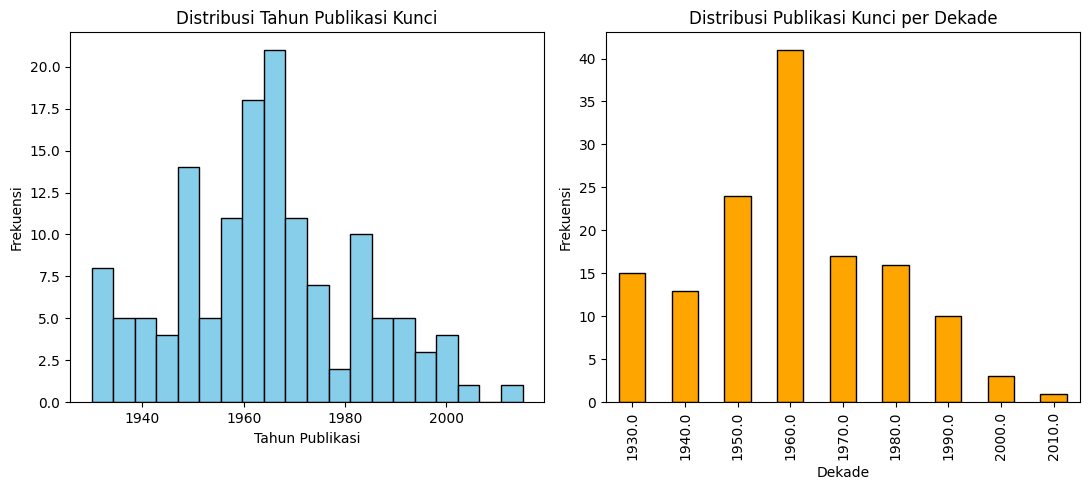

In [ ]:
#TAHUN PUBLIKASI KUNCI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import re

file_path = "Dataset Proyek LiDIA.csv"
data = pd.read_csv(file_path, sep=None, engine='python', encoding='latin1')

#konversi
data['Tahun Nobel'] = pd.to_numeric(data['Tahun Nobel'], errors='coerce')

def extract_all_years(value):
    """
    Mengekstrak semua tahun dari kolom 'Tahun Publikasi Kunci',
    - Rentang tahun
    - Beberapa tahun dipisah & atau koma ("1953 & 1961, 1965")
    - Tahun tidak standar ("1990-an")
    """
    if pd.isna(value):
        return []

    text = str(value)
    years = set()

    for start, end in re.findall(r'(\d{4})\s*[-–]\s*(\d{4})', text):
        start, end = int(start), int(end)
        if start <= end:
            for y in range(start, end + 1):
                years.add(y)
        else:
            for y in range(end, start + 1):
                years.add(y)

    for y in re.findall(r'(?<!\d)(1[89]\d{2}|20\d{2})(?!\d)', text):
        years.add(int(y))

    for y in re.findall(r'(1[89]\d{2}|20\d{2})\s*[-–]?\s*(?:an|s)', text):
        years.add(int(y[:4]))

    for y in re.findall(r'(?:thn|tahun|sekitar|±)\s*(1[89]\d{2}|20\d{2})', text, flags=re.IGNORECASE):
        years.add(int(y))

    rentang_mixed = re.findall(r'(\d{4})\s*[-–]\s*(?:sekitar|thn|tahun|±)?\s*(\d{4})', text, flags=re.IGNORECASE)
    for start, end in rentang_mixed:
        start, end = int(start), int(end)
        if start <= end:
            for y in range(start, end + 1):
                years.add(y)
        else:
            for y in range(end, start + 1):
                years.add(y)

    return sorted(years)

data['Daftar Tahun Publikasi'] = data['Tahun Publikasi Kunci'].apply(extract_all_years)
expanded_data = data.explode('Daftar Tahun Publikasi').copy()
expanded_data['Tahun Publikasi Kunci'] = pd.to_numeric(expanded_data['Daftar Tahun Publikasi'], errors='coerce')

filtered_data = expanded_data[(expanded_data['Tahun Nobel'] >= 1960) & (expanded_data['Tahun Nobel'] <= 2025)]

tahun_pub = filtered_data['Tahun Publikasi Kunci'].dropna()

#analisis statistik
statistik_pub = {
    'Jumlah Data': tahun_pub.count(),
    'Rata-rata': tahun_pub.mean(),
    'Median': tahun_pub.median(),
    'Modus': tahun_pub.mode().iloc[0] if not tahun_pub.mode().empty else None,
    'Standar Deviasi': tahun_pub.std(),
    'Varian': tahun_pub.var(),
    'Nilai Minimum': tahun_pub.min(),
    'Nilai Maksimum': tahun_pub.max(),
    'Rentang (Range)': tahun_pub.max() - tahun_pub.min(),
    'IQR (Q3 - Q1)': tahun_pub.quantile(0.75) - tahun_pub.quantile(0.25),
    'Persentil 10%': tahun_pub.quantile(0.10),
    'Persentil 25%': tahun_pub.quantile(0.25),
    'Persentil 50%': tahun_pub.quantile(0.50),
    'Persentil 75%': tahun_pub.quantile(0.75),
    'Persentil 90%': tahun_pub.quantile(0.90),
    'Koefisien Variasi (CV)': tahun_pub.std() / tahun_pub.mean(),
    'Skewness (Kemiringan)': skew(tahun_pub, nan_policy='omit'),
    'Kurtosis (Keruncingan)': kurtosis(tahun_pub, nan_policy='omit')
}

tahun_pub_decade = (tahun_pub // 10 * 10).value_counts().sort_index()

print("Statistik Tahun Publikasi Kunci:\n")
for k, v in statistik_pub.items():
    print(f"{k:28s}: {v:.2f}" if isinstance(v, (int, float, np.float64)) else f"{k:28s}: {v}")

print("\n Distribusi Frekuensi per Dekade:")
print(tahun_pub_decade)

#visualisasi data
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
plt.hist(tahun_pub, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribusi Tahun Publikasi Kunci")
plt.xlabel("Tahun Publikasi")
plt.ylabel("Frekuensi")

plt.subplot(1, 2, 2)
tahun_pub_decade.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Distribusi Publikasi Kunci per Dekade")
plt.xlabel("Dekade")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()


In [ ]:
#JEDA WAKTU
import pandas as pd
import numpy as np
from scipy.stats import mode, skew, kurtosis

file_path = "Proyek LIDIA(Sheet1) (2) (1).csv"
df = pd.read_csv(file_path, encoding="latin-1", sep=";")

col_gap = "Jeda Waktu"

def parse_gap(value):
    if pd.isna(value):
        return None
    parts = str(value).split("&")
    results = []

    for p in parts:
        p = p.strip()
        if "-" in p:
            a, b = p.split("-")
            try:
                a, b = float(a), float(b)
                results.append((a + b) / 2)
            except:
                continue
        else:
            try:
                results.append(float(p))
            except:
                continue
    return results

df["Parsed_Gap"] = df[col_gap].apply(parse_gap)

df_gap = df.explode("Parsed_Gap")
df_gap["Parsed_Gap"] = pd.to_numeric(df_gap["Parsed_Gap"], errors="coerce")
df_gap = df_gap.dropna(subset=["Parsed_Gap"])

gap_values = df_gap["Parsed_Gap"].astype(float).values

#analisis statistik
bins = [0, 5, 10, 20, 30, 40, 50, np.max(gap_values) + 1]
labels = ["0–5", "6–10", "11–20", "21–30", "31–40", "41–50", ">50"]

df_gap["Gap_Category"] = pd.cut(gap_values, bins=bins, labels=labels, right=True)
gap_freq = df_gap["Gap_Category"].value_counts().sort_index()

stats_result = {
    "Jumlah Data": len(gap_values),
    "Rata-rata": np.mean(gap_values),
    "Median": np.median(gap_values),
    "Standar Deviasi": np.std(gap_values, ddof=1),
    "Varian": np.var(gap_values, ddof=1),
    "Minimum": np.min(gap_values),
    "Maksimum": np.max(gap_values),
    "Rentang (Range)": np.max(gap_values) - np.min(gap_values),
    "Persentil 10%": np.percentile(gap_values, 10),
    "Persentil 25%": np.percentile(gap_values, 25),
    "Persentil 50%": np.percentile(gap_values, 50),
    "Persentil 75%": np.percentile(gap_values, 75),
    "Persentil 90%": np.percentile(gap_values, 90),
    "Skewness": skew(gap_values),
    "Kurtosis": kurtosis(gap_values),
}

vals, counts = np.unique(gap_values, return_counts=True)
mode_value = vals[np.argmax(counts)]
stats_result["Modus"] = mode_value

print("\n=== STATISTIK JEDA WAKTU ===")
for k, v in stats_result.items():
    print(f"{k}: {v}")

print("\n=== DISTRIBUSI FREKUENSI (BERDASARKAN RENTANG DURASI) ===")
print(gap_freq)



=== STATISTIK JEDA WAKTU ===
Jumlah Data: 106
Rata-rata: 25.38679245283019
Median: 23.0
Standar Deviasi: 14.30189514895673
Varian: 204.54420485175206
Minimum: 1.0
Maksimum: 55.0
Rentang (Range): 54.0
Persentil 10%: 6.5
Persentil 25%: 15.0
Persentil 50%: 23.0
Persentil 75%: 39.0
Persentil 90%: 44.0
Skewness: 0.28782455165742127
Kurtosis: -0.9208481251843113
Modus: 22.0

=== DISTRIBUSI FREKUENSI (BERDASARKAN RENTANG DURASI) ===
Gap_Category
0–5       7
6–10      8
11–20    29
21–30    24
31–40    17
41–50    16
>50       5
Name: count, dtype: int64


In [ ]:
#KEWARNEGARAAN PARA PENERIMA
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

file_path = "Proyek LIDIA(Sheet1) (2) (1).csv"

df = pd.read_csv(file_path, encoding="latin-1", sep=";")

col_nationality = "Warga Negara"
col_year = "Tahun Nobel"

df_expanded = df.assign(
    WargaNegara=df[col_nationality].str.split("/")
).explode("WargaNegara")

df_expanded["WargaNegara"] = df_expanded["WargaNegara"].str.strip()

country_counts = df_expanded["WargaNegara"].value_counts()

data_vals = country_counts.values

#analisis statistik
stats_result = {
    "Jumlah Negara": len(country_counts),
    "Total Hitungan Nobel (setelah explode)": data_vals.sum(),
    "Rata-rata per Negara": np.mean(data_vals),
    "Median per Negara": np.median(data_vals),
    "Standar Deviasi": np.std(data_vals, ddof=1),
    "Varian": np.var(data_vals, ddof=1),
    "Minimum": np.min(data_vals),
    "Maksimum": np.max(data_vals),
    "Rentang": np.max(data_vals) - np.min(data_vals),
    "Persentil 10%": np.percentile(data_vals, 10),
    "Persentil 25%": np.percentile(data_vals, 25),
    "Persentil 50%": np.percentile(data_vals, 50),
    "Persentil 75%": np.percentile(data_vals, 75),
    "Persentil 90%": np.percentile(data_vals, 90),
    "Skewness": skew(data_vals),
    "Kurtosis": kurtosis(data_vals)
}

top_country = country_counts.idxmax()
top_country_count = country_counts.max()

df["SplitTmp"] = df[col_nationality].str.split("/")
count_multinational = df[df["SplitTmp"].str.len() > 1].shape[0]

top10 = country_counts.head(10)

country_table = country_counts.reset_index()
country_table.columns = ["Negara", "Jumlah Penerima"]

df_expanded["Decade"] = (df_expanded[col_year] // 10) * 10
trend_decade = df_expanded["Decade"].value_counts().sort_index()

print("\n=== STATISTIK NUMERIK JUMLAH NOBEL PER NEGARA ===")
for k, v in stats_result.items():
    print(f"{k}: {v}")

print("\n=== NEGARA DENGAN PENERIMA TERBANYAK ===")
print(f"{top_country}: {top_country_count}")

print("\n=== JUMLAH LAUREATE DENGAN KEWARGANEGARAAN GANDA ===")
print(count_multinational)

print("\n=== TOP 10 NEGARA PENERIMA NOBEL PHYSICS ===")
print(top10.to_string())

print("\n=== DAFTAR LENGKAP SELURUH NEGARA + JUMLAH PENERIMA ===")
print(country_table.to_string(index=False))

print("\n=== TREN PENERIMA NOBEL PHYSICS PER DEKADE ===")
print(trend_decade.to_string())



=== STATISTIK NUMERIK JUMLAH NOBEL PER NEGARA ===
Jumlah Negara: 24
Total Hitungan Nobel (setelah explode): 178
Rata-rata per Negara: 7.416666666666667
Median per Negara: 2.5
Standar Deviasi: 17.209493504071137
Varian: 296.16666666666663
Minimum: 1
Maksimum: 86
Rentang: 85
Persentil 10%: 1.0
Persentil 25%: 1.0
Persentil 50%: 2.5
Persentil 75%: 5.5
Persentil 90%: 11.7
Skewness: 4.20482422514389
Kurtosis: 16.735801299031376

=== NEGARA DENGAN PENERIMA TERBANYAK ===
Amerika Serikat: 86

=== JUMLAH LAUREATE DENGAN KEWARGANEGARAAN GANDA ===
30

=== TOP 10 NEGARA PENERIMA NOBEL PHYSICS ===
WargaNegara
Amerika Serikat    86
Jerman             14
Prancis            12
Inggris            11
Jepang             11
Kanada              7
Belanda             5
Swiss               4
Britania Raya       4
Rusia               3

=== DAFTAR LENGKAP SELURUH NEGARA + JUMLAH PENERIMA ===
         Negara  Jumlah Penerima
Amerika Serikat               86
         Jerman               14
        Prancis     

📊 Statistik Usia Penerima Nobel:

Jumlah Data                 : 147
Rata-rata                   : 63.24
Median                      : 64.00
Modus                       : 68.00
Standar Deviasi             : 14.23
Varian                      : 202.50
Nilai Minimum               : 33.00
Nilai Maksimum              : 96.00
Rentang (Range)             : 63.00
IQR (Q3 - Q1)               : 22.00
Persentil 10%               : 44.00
Persentil 25%               : 52.50
Persentil 50%               : 64.00
Persentil 75%               : 74.50
Persentil 90%               : 82.40
Koefisien Variasi (CV)      : 0.23
Skewness (Kemiringan)       : 0.03
Kurtosis (Keruncingan)      : -0.84

📈 Distribusi Frekuensi Usia (dalam tahun):
usia_saat_menerima
[20, 30)      0
[30, 40)      5
[40, 50)     25
[50, 60)     29
[60, 70)     37
[70, 80)     31
[80, 90)     17
[90, 100)     3
Name: count, dtype: int64


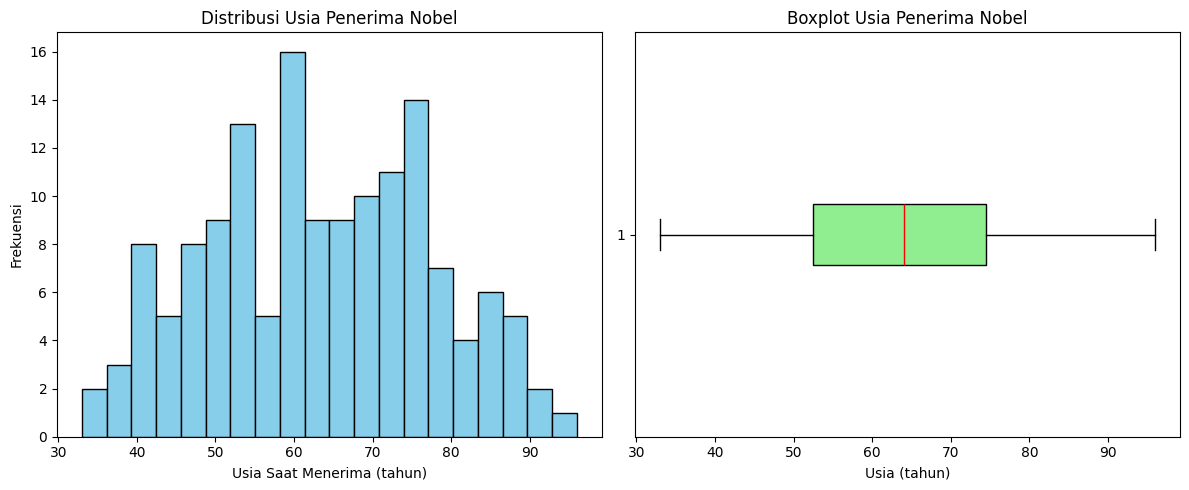

In [ ]:
#USIA SAAT MENERIMA NOBEL
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

file_path = "Dataset Proyek LiDIA.csv"
data = pd.read_csv(file_path, sep=None, engine='python', encoding='latin1')

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

if 'usia_saat_menerima' not in data.columns:
    raise KeyError("Kolom 'Usia Saat Menerima' tidak ditemukan di dataset.")

usia = pd.to_numeric(data['usia_saat_menerima'], errors='coerce')
usia = usia[(usia > 20) & (usia < 100)]

#analisis statistik
statistik_usia = {
    'Jumlah Data': usia.count(),
    'Rata-rata': usia.mean(),
    'Median': usia.median(),
    'Modus': usia.mode().iloc[0] if not usia.mode().empty else None,
    'Standar Deviasi': usia.std(),
    'Varian': usia.var(),
    'Nilai Minimum': usia.min(),
    'Nilai Maksimum': usia.max(),
    'Rentang (Range)': usia.max() - usia.min(),
    'IQR (Q3 - Q1)': usia.quantile(0.75) - usia.quantile(0.25),
    'Persentil 10%': usia.quantile(0.10),
    'Persentil 25%': usia.quantile(0.25),
    'Persentil 50%': usia.quantile(0.50),
    'Persentil 75%': usia.quantile(0.75),
    'Persentil 90%': usia.quantile(0.90),
    'Koefisien Variasi (CV)': usia.std() / usia.mean(),
    'Skewness (Kemiringan)': skew(usia, nan_policy='omit'),
    'Kurtosis (Keruncingan)': kurtosis(usia, nan_policy='omit')
}

usia_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
usia_freq = pd.cut(usia, bins=usia_bins, right=False).value_counts().sort_index()

print("📊 Statistik Usia Penerima Nobel:\n")
for k, v in statistik_usia.items():
    if isinstance(v, (int, float, np.float64)):
        print(f"{k:28s}: {v:.2f}")
    else:
        print(f"{k:28s}: {v}")

print("\n📈 Distribusi Frekuensi Usia (dalam tahun):")
print(usia_freq)

#visualisasi data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(usia, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribusi Usia Penerima Nobel")
plt.xlabel("Usia Saat Menerima (tahun)")
plt.ylabel("Frekuensi")

plt.subplot(1, 2, 2)
plt.boxplot(usia, vert=False, patch_artist=True,
             boxprops=dict(facecolor='lightgreen', color='black'),
             medianprops=dict(color='red'))
plt.title("Boxplot Usia Penerima Nobel")
plt.xlabel("Usia (tahun)")

plt.tight_layout()
plt.show()


📊 Statistik Jumlah Penerima Nobel (1960–2025):

Jumlah Data         : 61
Rata-rata           : 2.41
Standar Deviasi     : 0.74
Nilai Minimum       : 1.00
Nilai Maksimum      : 3.00
Median              : 3.00
Persentil 10%       : 1.00
Persentil 25%       : 2.00
Persentil 50%       : 3.00
Persentil 75%       : 3.00
Persentil 90%       : 3.00
Varian              : 0.55
Rentang (Range)     : 2.00
Modus               : 3.00

📈 Distribusi Frekuensi Jumlah Penerima:
Jumlah Penerima
1.0     9
2.0    18
3.0    34
Name: count, dtype: int64


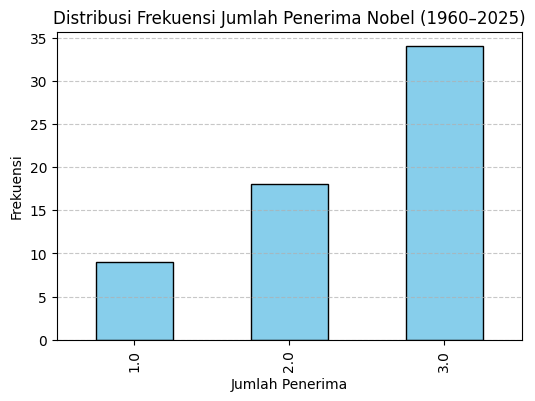

In [ ]:
#JUMLAH PENERIMA NOBEL
import pandas as pd

file_path = "Dataset Proyek LiDIA.csv"
data = pd.read_csv(file_path, sep=None, engine='python', encoding='latin1')

data['Jumlah Penerima'] = pd.to_numeric(data['Jumlah Penerima'], errors='coerce')
data['Tahun Nobel'] = pd.to_numeric(data['Tahun Nobel'], errors='coerce')

filtered_data = data[(data['Tahun Nobel'] >= 1960) & (data['Tahun Nobel'] <= 2025)]

jumlah = filtered_data['Jumlah Penerima'].dropna()

#analisis statistik
statistik = {
    'Jumlah Data': jumlah.count(),
    'Rata-rata': jumlah.mean(),
    'Standar Deviasi': jumlah.std(),
    'Nilai Minimum': jumlah.min(),
    'Nilai Maksimum': jumlah.max(),
    'Median': jumlah.median(),
    'Persentil 10%': jumlah.quantile(0.10),
    'Persentil 25%': jumlah.quantile(0.25),
    'Persentil 50%': jumlah.quantile(0.50),
    'Persentil 75%': jumlah.quantile(0.75),
    'Persentil 90%': jumlah.quantile(0.90),
    'Varian': jumlah.var(),
    'Rentang (Range)': jumlah.max() - jumlah.min(),
    'Modus': jumlah.mode().iloc[0] if not jumlah.mode().empty else None
}

frekuensi = jumlah.value_counts().sort_index()

print("📊 Statistik Jumlah Penerima Nobel (1960–2025):\n")
for k, v in statistik.items():
    print(f"{k:20s}: {v:.2f}" if isinstance(v, (int, float)) else f"{k:20s}: {v}")

print("\n📈 Distribusi Frekuensi Jumlah Penerima:")
print(frekuensi)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
frekuensi.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Frekuensi Jumlah Penerima Nobel (1960–2025)')
plt.xlabel('Jumlah Penerima')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
